<a href="https://colab.research.google.com/github/tseykoroman/Finance/blob/main/time_series_forecasting_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://builtin.com/data-science/time-series-forecasting-python

In [1]:
!pip install autokeras

In [29]:
import pandas as pd
import yfinance as yf

# Установите библиотеку yfinance, если она еще не установлена
# pip install yfinance

# Установите библиотеку pandas, если она еще не установлена
# pip install pandas

# Укажите интересующий вас промежуток времени
start_date = '2018-01-01'
end_date = '2023-12-21'

# Задайте символ биткоина (BTC-USD) и используйте функцию download для получения данных
data = yf.download('BTC-USD', start=start_date, end=end_date)

# Результатом будет объект DataFrame с данными о цене биткоина за указанный период
# print(data)

# Сохраните полученные данные в файл CSV
data.to_csv('bitcoin_prices.csv')

[*********************100%%**********************]  1 of 1 completed


In [30]:
# Список названий колонок, которые нужно оставить
desired_columns = ["Close", "Date"]

# Фильтрация DataFrame по названиям колонок
filtered_df = data.filter(items=desired_columns)
filtered_df.head()

,Close
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000


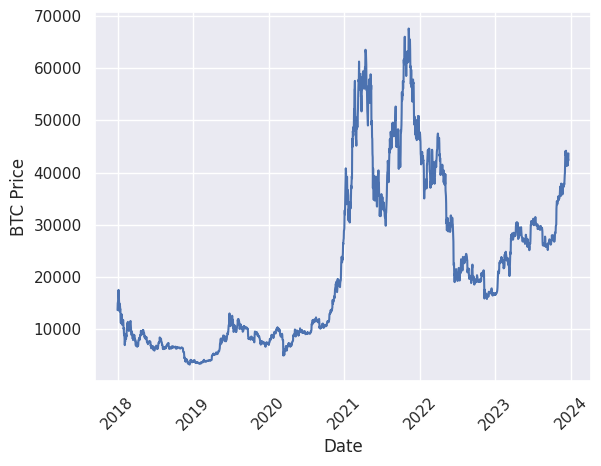

In [31]:
import pandas as pd
import pandas_datareader as web
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set()
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(filtered_df.index, filtered_df['Close'], )
plt.show()

In [32]:
train = filtered_df[filtered_df.index < pd.to_datetime("2023-11-01", format='%Y-%m-%d')]
test = filtered_df[filtered_df.index >= pd.to_datetime("2023-11-01", format='%Y-%m-%d')]

In [33]:
print(train.shape)
print(test.shape)

(2130, 1)
(50, 1)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARMA RMSE:  5485.810014641642


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

ARIMA RMSE:  2575.287117256003


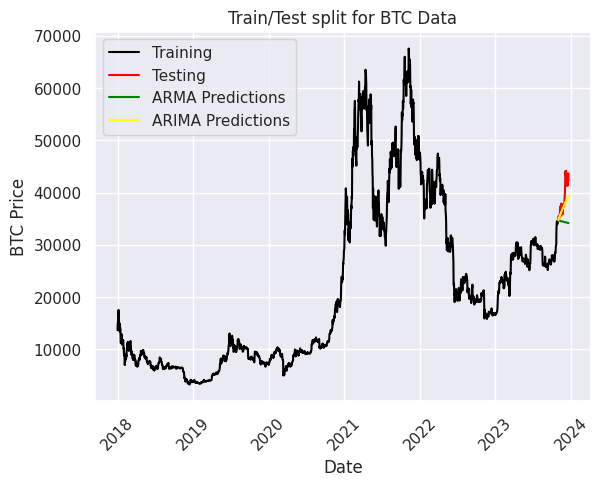

In [34]:
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")

y = train['Close']

ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(y_pred_out, color='green', label = 'ARMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df["Predictions"]))
print("ARMA RMSE: ",arma_rmse)




ARIMAmodel = ARIMA(y, order = (5, 4, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ",arma_rmse)



# SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
# SARIMAXmodel = SARIMAXmodel.fit()

# y_pred = SARIMAXmodel.get_forecast(len(test.index))
# y_pred_df = y_pred.conf_int(alpha = 0.05)
# y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
# y_pred_df.index = test.index
# y_pred_out = y_pred_df["Predictions"]
# plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
# plt.legend()


# import numpy as np
# from sklearn.metrics import mean_squared_error

# arma_rmse = np.sqrt(mean_squared_error(test["Close"].values, y_pred_df["Predictions"]))
# print("SARIMA RMSE: ",arma_rmse)

In [35]:
import pandas as pd
import tensorflow as tf

import autokeras as ak

To make this tutorial easy to follow, we use the UCI Airquality dataset, and try to
forecast the AH value at the different timesteps. Some basic preprocessing has also
been performed on the dataset as it required cleanup.

## A Simple Example
The first step is to prepare your data. Here we use the [UCI Airquality
dataset](https://archive.ics.uci.edu/ml/datasets/Air+Quality) as an example.


In [36]:
#######################################################################################
data_train = data[data.index < pd.to_datetime("2023-11-01", format='%Y-%m-%d')]
validation_data = data[data.index >= pd.to_datetime("2023-11-01", format='%Y-%m-%d')]
#######################################################################################
data_x = data_train[
    [
        "Open", "High", "Low", "Volume"
    ]
].astype("float64")
data_y = data_train["Close"].astype("float64")
#######################################################################################

data_x_val = validation_data[
    [
        "Open", "High", "Low", "Volume"
    ]
].astype("float64")
data_y_val = validation_data["Close"].astype("float64")
#######################################################################################
# Data with train data and the unseen data from subsequent time steps.
data_x_test = dataset[
    [
        "Open", "High", "Low", "Volume"
    ]
].astype("float64")



print(data_train.shape)
print(validation_data.shape)

(2130, 6)
(50, 6)


The second step is to run the [TimeSeriesForecaster](/time_series_forecaster).
As a quick demo, we set epochs to 10.
You can also leave the epochs unspecified for an adaptive number of epochs.


In [37]:
predict_from = 1
predict_until = 10
lookback = 10
clf = ak.TimeseriesForecaster(
    lookback=lookback,
    predict_from=predict_from,
    predict_until=predict_until,
    #loss="root_mean_squared_error",
    max_trials=3,
    objective="val_loss",
)
# Train the TimeSeriesForecaster with train data
clf.fit(
    x=data_x,
    y=data_y,
    validation_data=(data_x_val, data_y_val),
    batch_size=32,
    epochs=10,
)
# Predict with the best model(includes original training data).
predictions = clf.predict(data_x_test)
print(predictions.shape)
# Evaluate the best model with testing data.
print(clf.evaluate(data_x_val, data_y_val))

Reloading Tuner from ./time_series_forecaster/tuner0.json
Epoch 1/10
67/67 [==============================] - 12s 50ms/step - loss: 490974336.0000 - mean_squared_error: 490974336.0000 - val_loss: 809866688.0000 - val_mean_squared_error: 809866688.0000
Epoch 2/10
67/67 [==============================] - 1s 19ms/step - loss: 300193024.0000 - mean_squared_error: 300193024.0000 - val_loss: 514300608.0000 - val_mean_squared_error: 514300608.0000
Epoch 3/10
67/67 [==============================] - 1s 20ms/step - loss: 258777904.0000 - mean_squared_error: 258777904.0000 - val_loss: 389614496.0000 - val_mean_squared_error: 389614496.0000
Epoch 4/10
67/67 [==============================] - 1s 20ms/step - loss: 252194016.0000 - mean_squared_error: 252194016.0000 - val_loss: 332800896.0000 - val_mean_squared_error: 332800896.0000
Epoch 5/10
67/67 [==============================] - 2s 35ms/step - loss: 252617264.0000 - mean_squared_error: 252617264.0000 - val_loss: 305588768.0000 - val_mean_square

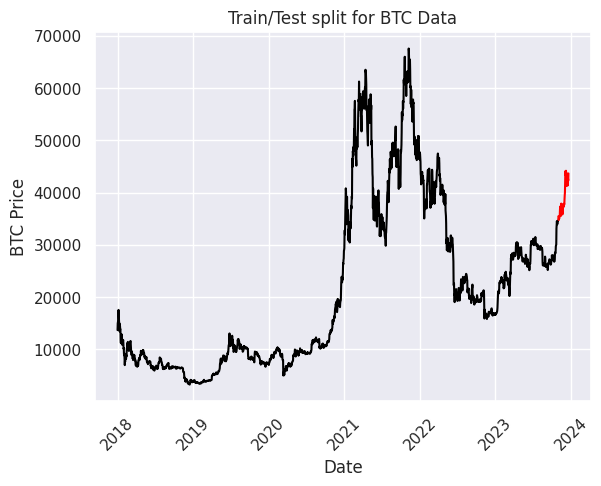

In [38]:
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
y = train['Close']

In [ ]:
ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

In [42]:
clf.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

TypeError: ignored